In [1]:
# warning 무시
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
from matplotlib import font_manager
import matplotlib.font_manager as fm
# '-' 깨짐 해결 모듈
import matplotlib as mpl

plt.rcParams["font.family"] = "Malgun Gothic"  # For Windows
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8,4)
print(plt.rcParams["font.family"])

# 마이너스 깨짐 해결
mpl.rcParams["axes.unicode_minus"] = False

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from bs4 import BeautifulSoup
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

from konlpy.tag import Okt
from collections import Counter
from konlpy.tag import Komoran
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud



import numpy as np
import pandas as pd
import pandas as pd
import requests
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

['Malgun Gothic']


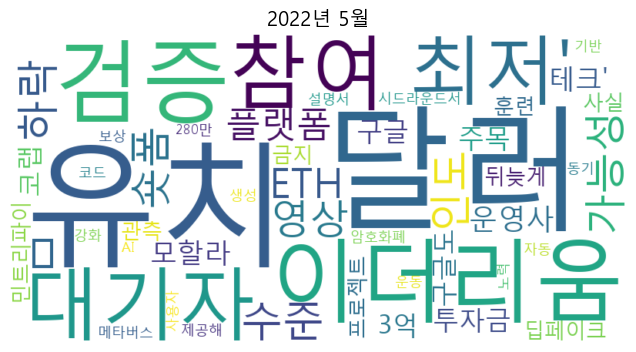

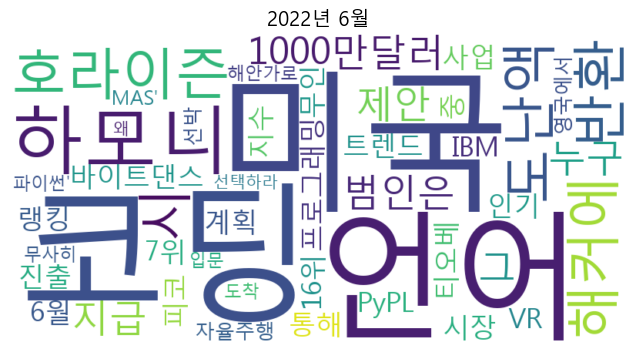

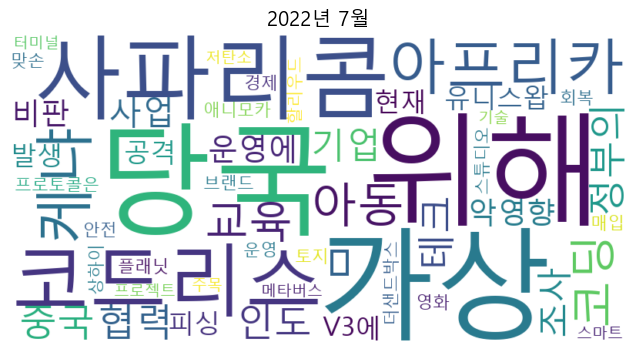

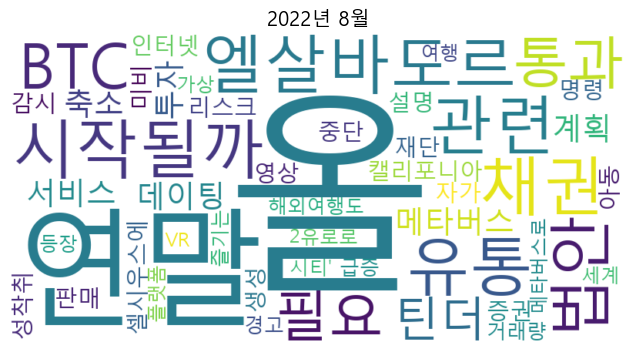

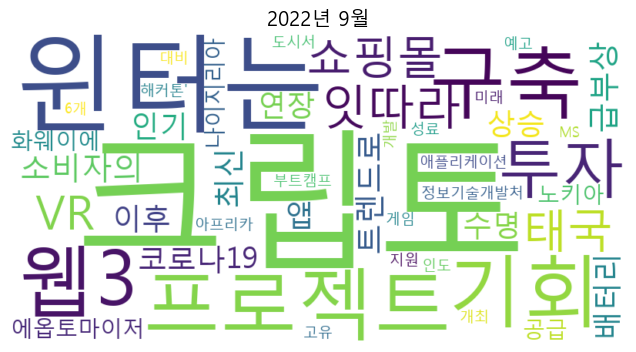

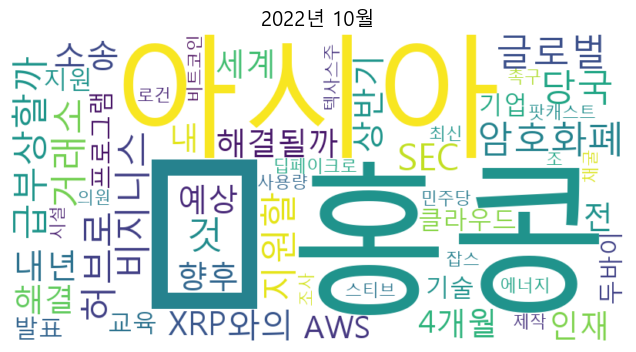

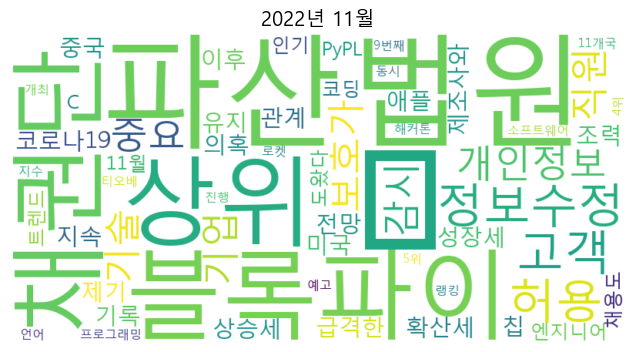

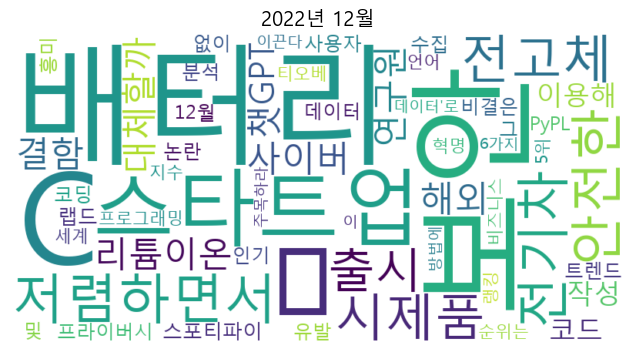

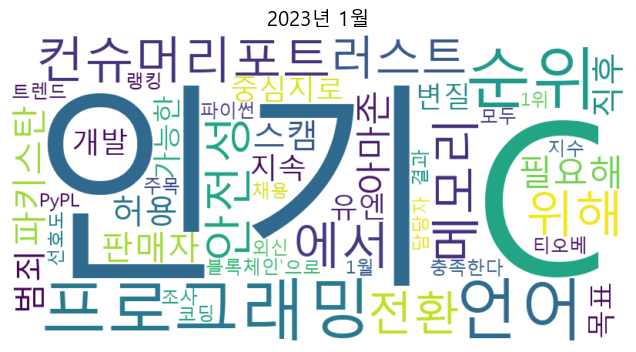

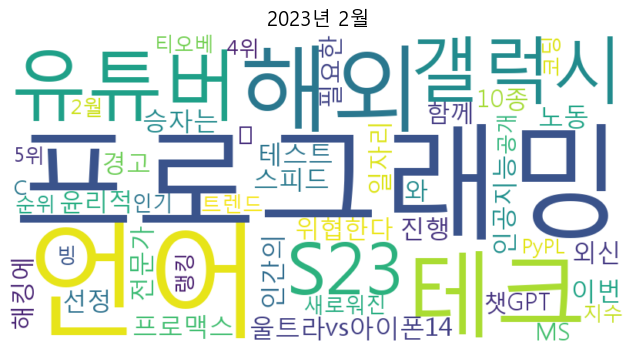

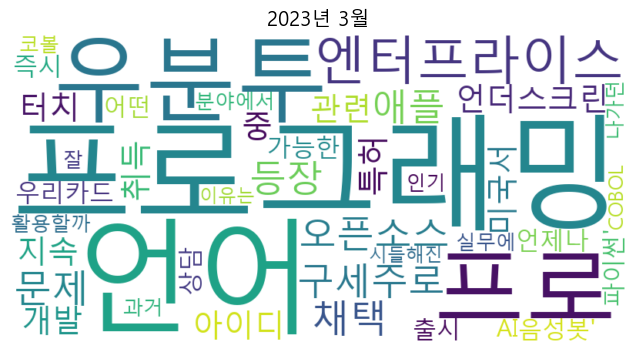

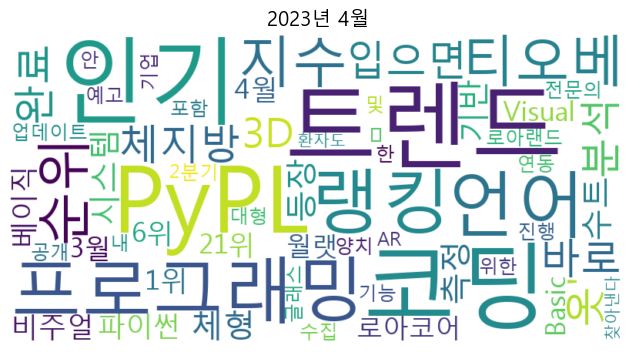

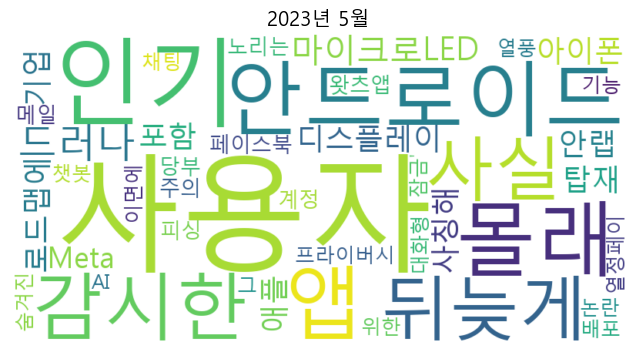

In [8]:
# CSV 파일 읽기
df = pd.read_csv('Project_data/data2/요즘IT.CSV')


# 날짜 형식으로 변환
df['news_date'] = pd.to_datetime(df['news_date'])

# 날짜 형식으로 변환
df['news_date'] = pd.to_datetime(df['news_date'])

# 필요한 기간 데이터 추출 (2022년 5월부터 2023년 5월까지)
start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2023-05-31')
filtered_df = df[(df['news_date'] >= start_date) & (df['news_date'] <= end_date)]

# 매달 상위 5개의 news_title 추출 및 워드클라우드 생성
for year in range(start_date.year, end_date.year + 1):
    for month in range(1, 13):
        if year == start_date.year and month < start_date.month:
            continue
        if year == end_date.year and month > end_date.month:
            continue
        
        # 해당 월의 데이터 필터링
        month_data = filtered_df[
            (filtered_df['news_date'].dt.year == year) & (filtered_df['news_date'].dt.month == month)
        ]
        
        # 상위 5개의 news_title 추출
        top_titles = month_data['news_title'].value_counts().head(5)
        
        # 워드클라우드 생성을 위한 텍스트 생성
        text = ' '.join(top_titles.index)
        
        # 워드클라우드 생성
        wordcloud = WordCloud(width=800, height=400, font_path='Project_data/data/malgun.ttf',background_color='white').generate(text)
        
        # 워드클라우드 출력
        plt.figure(figsize=(8, 4))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'{year}년 {month}월')
        
        # PNG 파일로 저장
        filename = f'{year}_{month:02d}.png'
        plt.savefig(filename, dpi=300)
        
        plt.show()